In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('TECH.csv')
print(data.shape)
data.head()

(4778, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-01,47.21875,52.18750,47.21875,50.93750,43.811466,520600
1,2000-09-05,51.28125,51.93750,48.37500,48.50000,41.714981,441200
2,2000-09-06,48.56250,49.50000,44.50000,44.62500,38.382084,500600
3,2000-09-07,45.00000,47.96875,44.59375,47.65625,40.989262,336800
4,2000-09-08,47.37500,47.37500,44.40625,44.84375,38.570236,367600


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LogisticRegression, Lasso,BayesianRidge
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from datetime import datetime
def date_conv(a):
    return datetime.strptime(a,'%Y-%m-%d')
def data_preprocess(data):
    data['Date'] = data['Date'].apply(date_conv)
    data['50MA'] = data['Close'].rolling(50).mean()
    data = data[~data['50MA'].isna()]
    data['prediction'] = data['Adj Close'].shift(-1)
    data.dropna(inplace=True)
    return data
def model_prediction(data, m):
    if m=='Linear':
        model = LinearRegression()
    elif m=='Ridge':
        model = Ridge(alpha=0.5)
    elif m=='Elastic':
        model = ElasticNet()
    elif m=='Lasso':
        model = Lasso()
    elif m=='BayesianRidge':
        model = BayesianRidge()
    else:
        raise ValueError('The possible model types are: Linear, Ridge, Elastic, Lasso and BayesianRidge')
    
    X = np.array(data.drop(['prediction','Date'],axis=1))
    Y = np.array(data['prediction'])
    X = scale(X)
    X_pred = X[-100:]

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.7)
    model.fit(X_train,Y_train)
    pred = model.predict(X_pred)
    Y_pred = model.predict(X_test)
    s = model.score(X_test,Y_test)
    print('Model: {} \t Score: {}'.format(m,s))
    
    plt.rcParams["figure.figsize"] =15,10
    plt.style.use('ggplot')
    plt.plot(data['Date'].tolist(),Y,label='Actual')
    plt.plot(data['Date'].tolist()[-100:],pred,label='Prediction')
    plt.legend()
    plt.xlabel('Closing Price')
    plt.ylabel('Date')
    plt.title('TECH - {} Regression Model'.format(m))
    

In [4]:
data = data_preprocess(data)

/Users/RohitM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/RohitM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50MA,prediction
49,2000-11-10,50.2500,54.28125,50.25000,51.53125,44.322159,108400,52.246094,40.881752
50,2000-11-13,49.0625,50.53125,47.06250,47.53125,40.881752,264800,52.177969,40.881752
51,2000-11-14,49.1250,49.50000,46.25000,47.53125,40.881752,224000,52.158594,43.058887
52,2000-11-15,47.8750,50.62500,47.53125,50.06250,43.058887,329200,52.267344,39.161541
53,2000-11-16,49.3125,50.81250,45.50000,45.53125,39.161541,168000,52.224844,40.854874


Model: Linear 	 Score: 0.9990985752187848


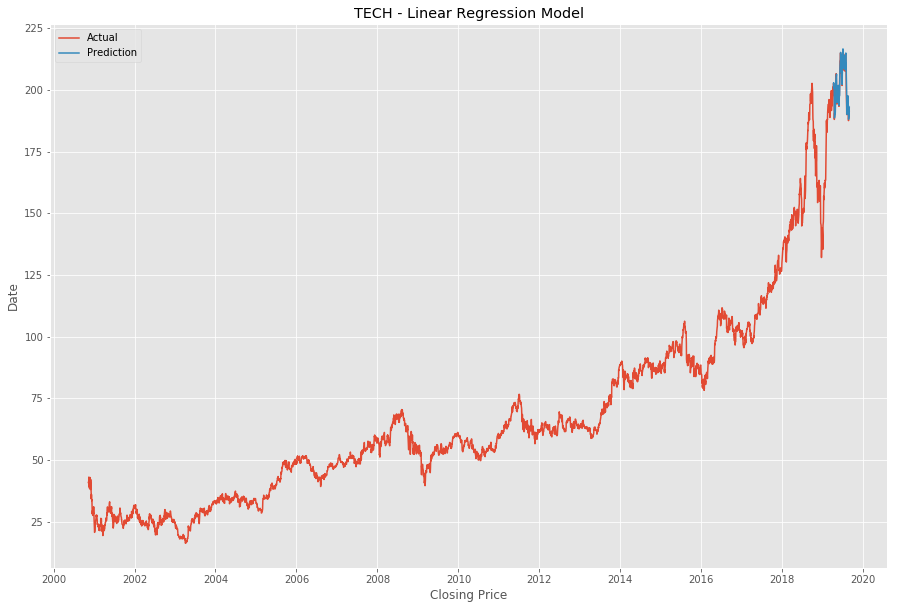

In [6]:
model_prediction(data,'Linear')

Model: Ridge 	 Score: 0.9990515025224684


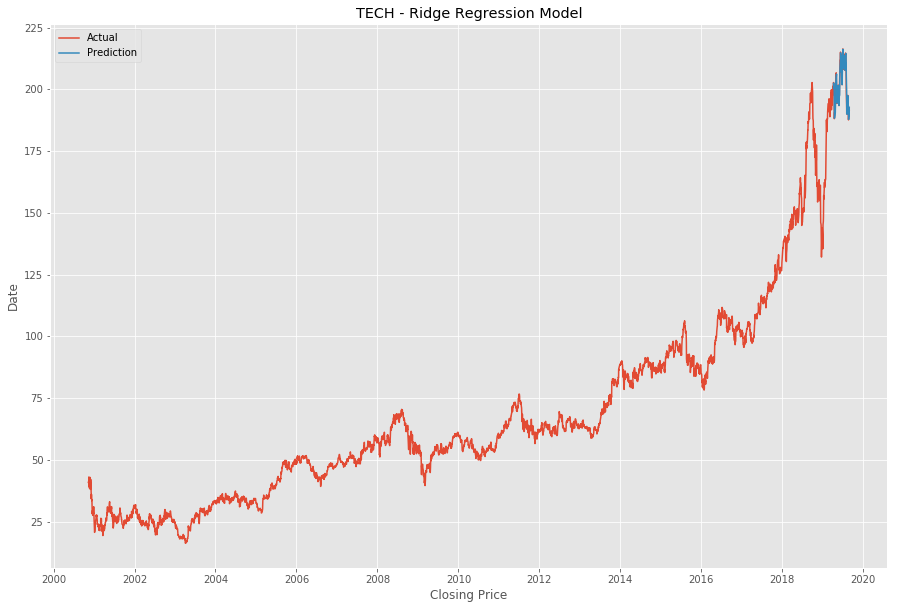

In [7]:
model_prediction(data,'Ridge')

Model: Elastic 	 Score: 0.9886630079757988


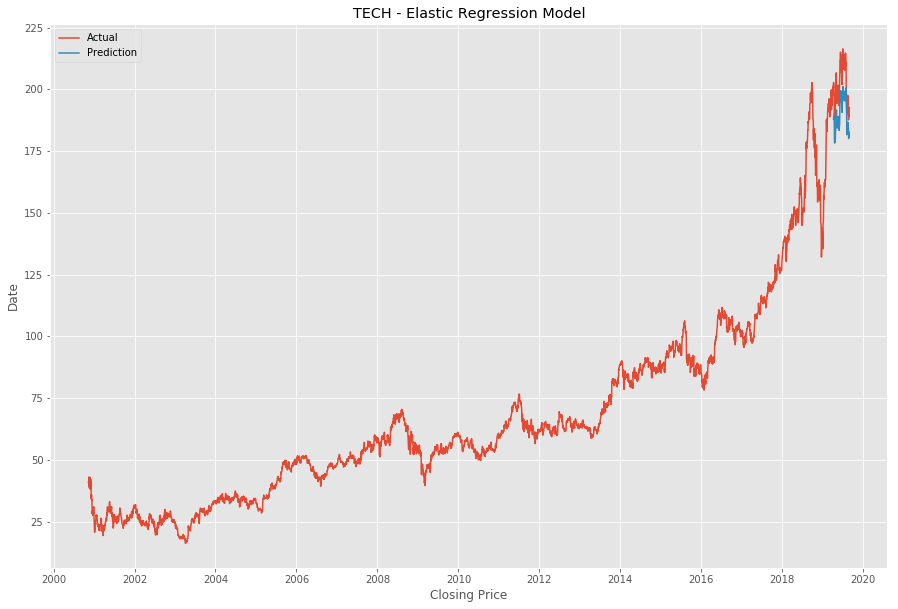

In [8]:
model_prediction(data,'Elastic')

Model: BayesianRidge 	 Score: 0.9991018588705376


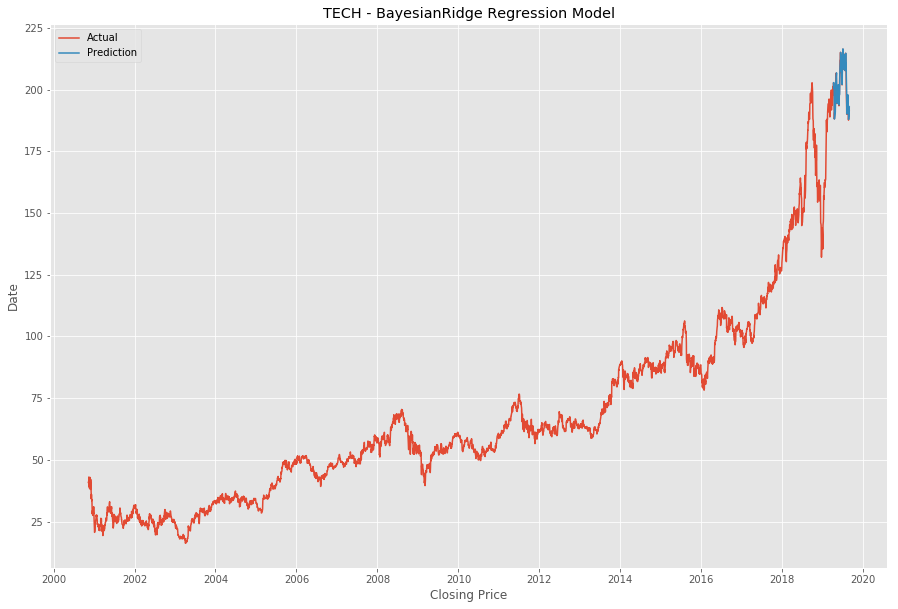

In [9]:
model_prediction(data,'BayesianRidge')

Model: Lasso 	 Score: 0.9985790746219366


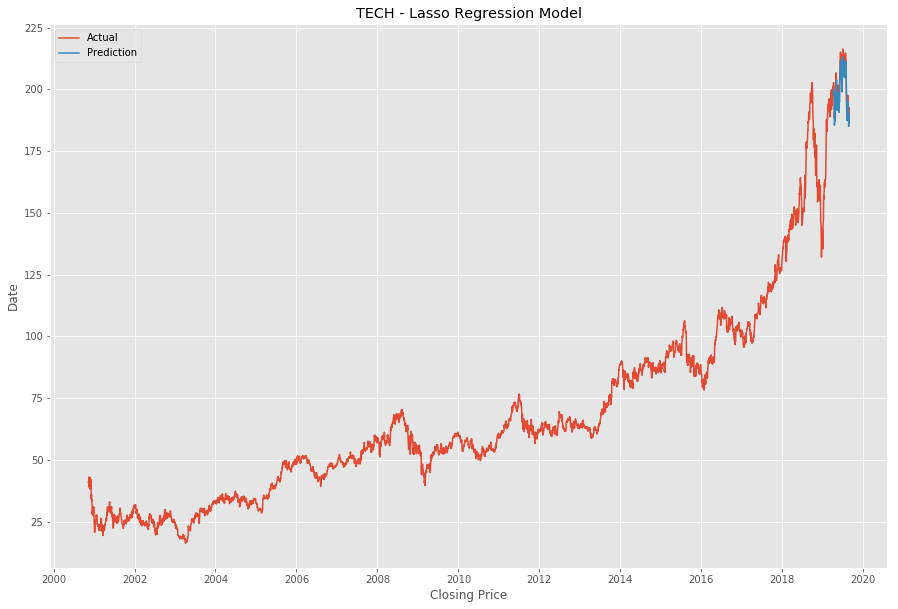

In [10]:
model_prediction(data,'Lasso')

In [11]:
model_prediction(data,'Model')

ValueError: The possible model types are: Linear, Ridge, Elastic, Lasso and BayesianRidge